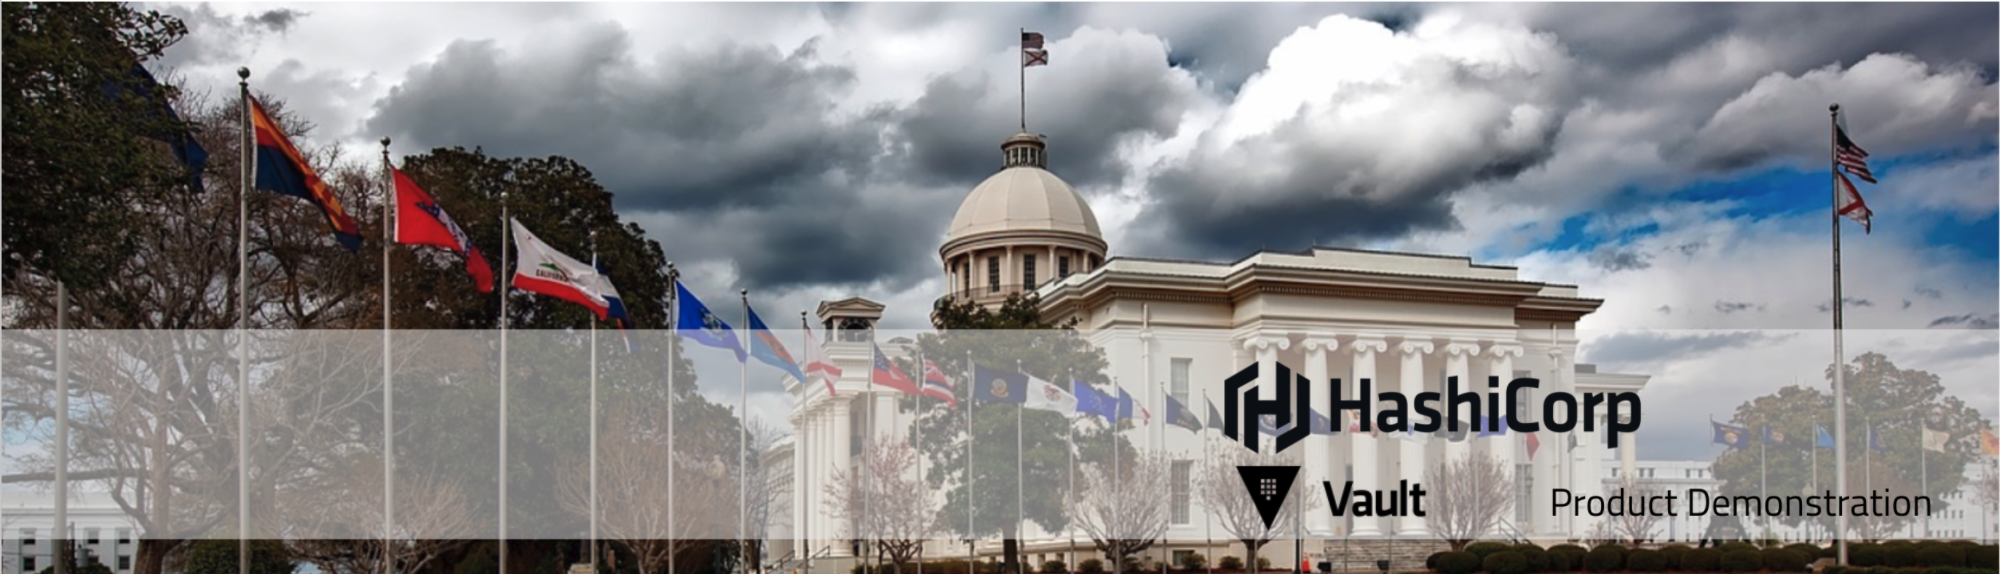

# Certificate Issuance
---

## Business Value of Capability
 * Use Vault as a Certificate Authority
 * Generate certs using apis for applications to enable TLS

### Prerequisites
* Running Vault Enterprise instance (even in dev mode)

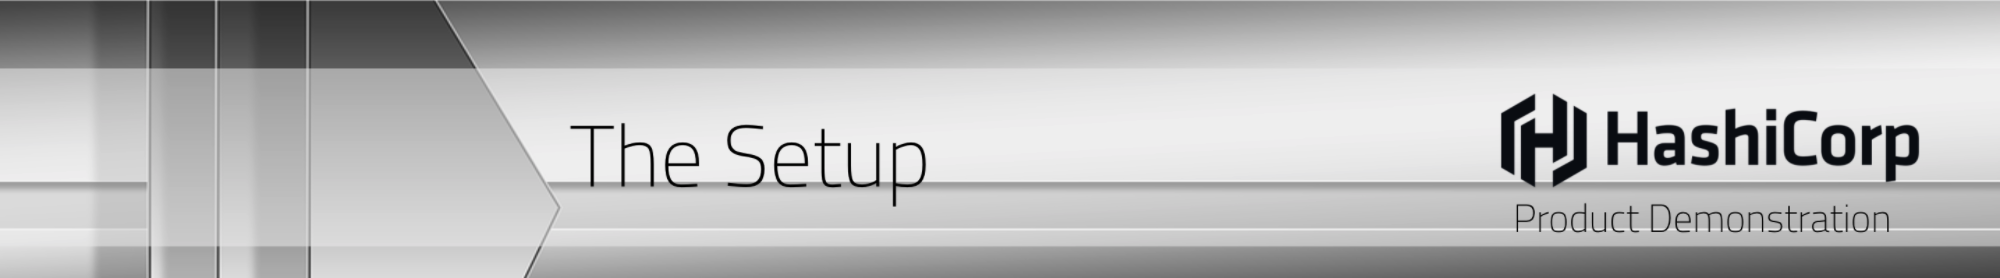
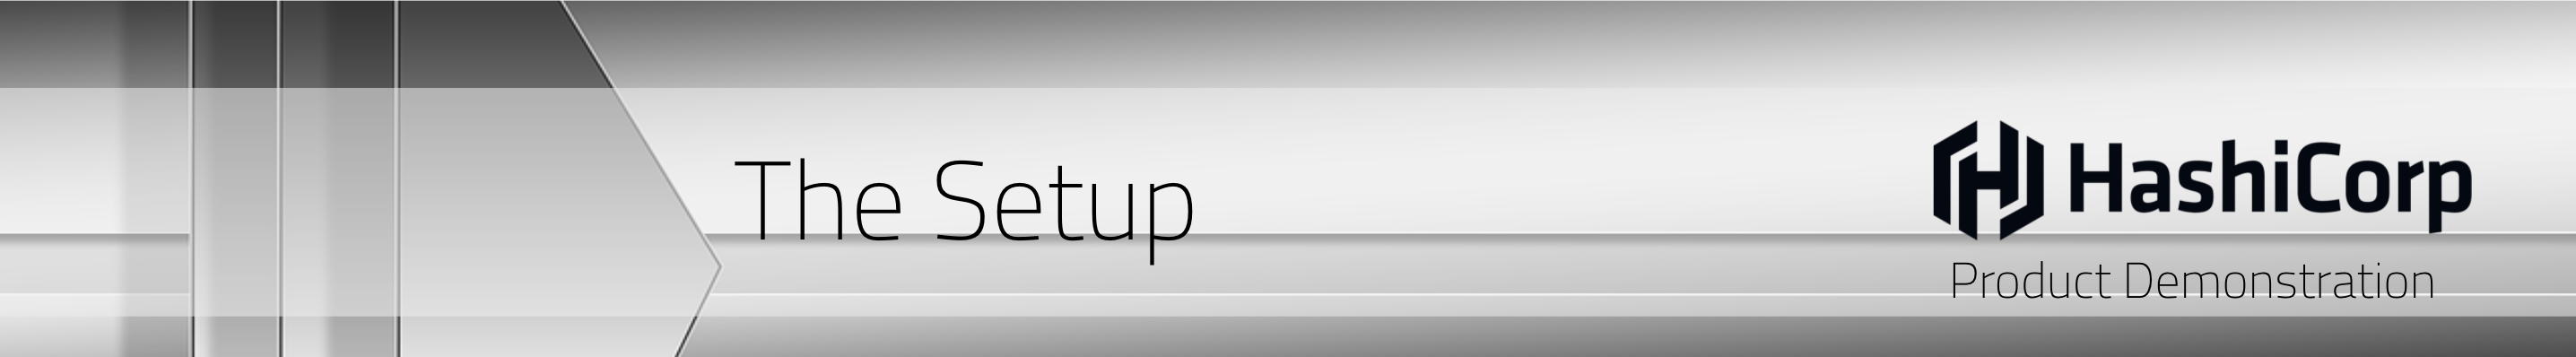

In [ ]:
export VAULT_ADDR=http://127.0.0.1:8200
export VAULT_TOKEN=root
export VAULT_SKIP_VERIFY=true

In [ ]:
vault login root

In [ ]:
vault status

In [ ]:
vault -version

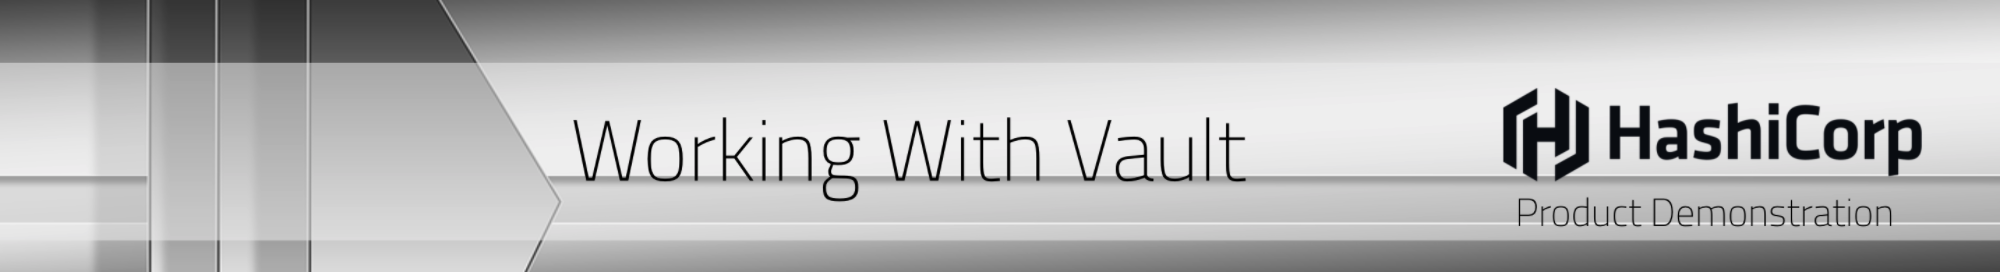
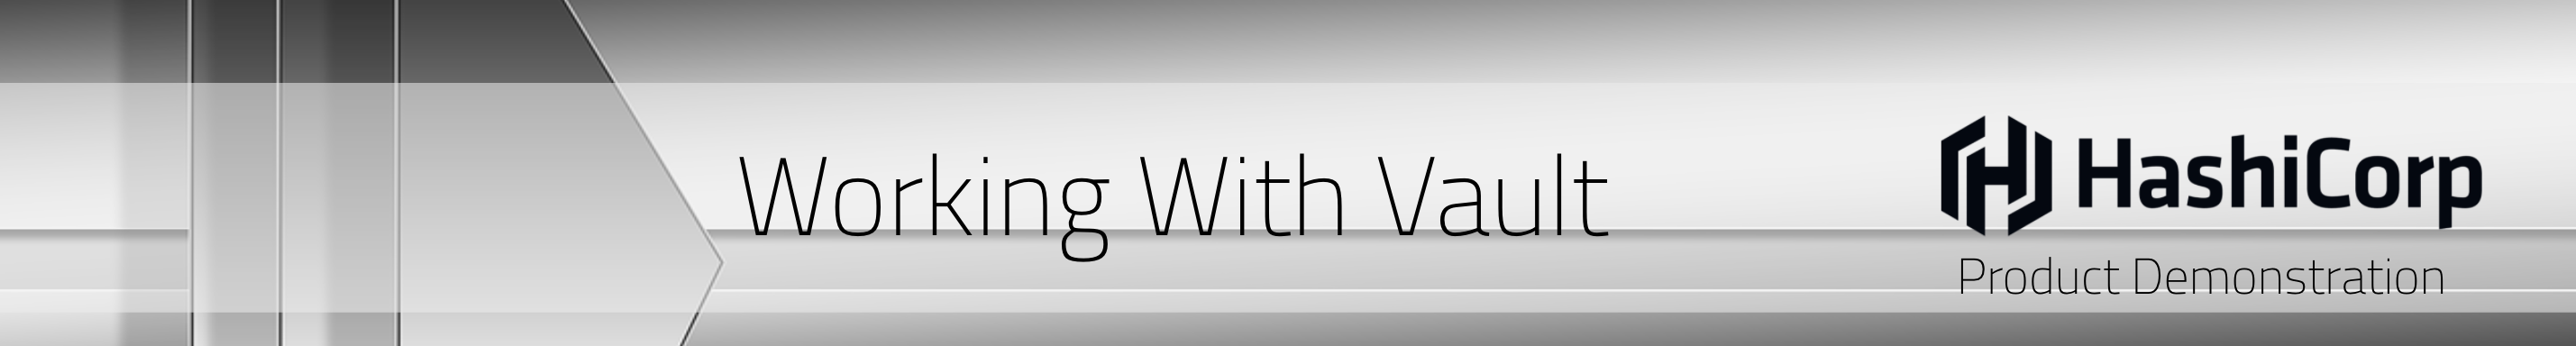

### Demo
---

### <span style="background-color: #001f3f; color: #80bfff; padding: 15px; border-radius: 2px">Enable the PKI Secrets Engine</span>

In [ ]:
vault secrets enable pki

**Tune the maximum length of a cert lease**

In [ ]:
vault secrets tune -max-lease-ttl=8760h pki

### <span style="background-color: #001f3f; color: #80bfff; padding: 15px; border-radius: 2px">Configure A CA certificate and private key </span>

**Generate a certificate**

In [ ]:
vault write pki/root/generate/internal \
    common_name=www.my-website.com \
    ttl=8760h

### <span style="background-color: #001f3f; color: #80bfff; padding: 15px; border-radius: 2px">Update the Certificate Revocation List</span>

**Update CRL**

In [ ]:
vault write pki/config/urls \
    issuing_certificates="http://127.0.0.1:8200/v1/pki/ca" \
    crl_distribution_points="http://127.0.0.1:8200/v1/pki/crl"

### <span style="background-color: #001f3f; color: #80bfff; padding: 15px; border-radius: 2px">Configure Role for Issuing Certs</span>

**Configure role**

In [ ]:
vault write pki/roles/example-dot-com \
    allowed_domains=my-website.com \
    allow_subdomains=true \
    max_ttl=72h

### <span style="background-color: #001f3f; color: #80bfff; padding: 15px; border-radius: 2px">Example Issue Request</span>

**Issue request**

In [ ]:
vault write pki/issue/example-dot-com \
    common_name=www.my-website.com

**END**

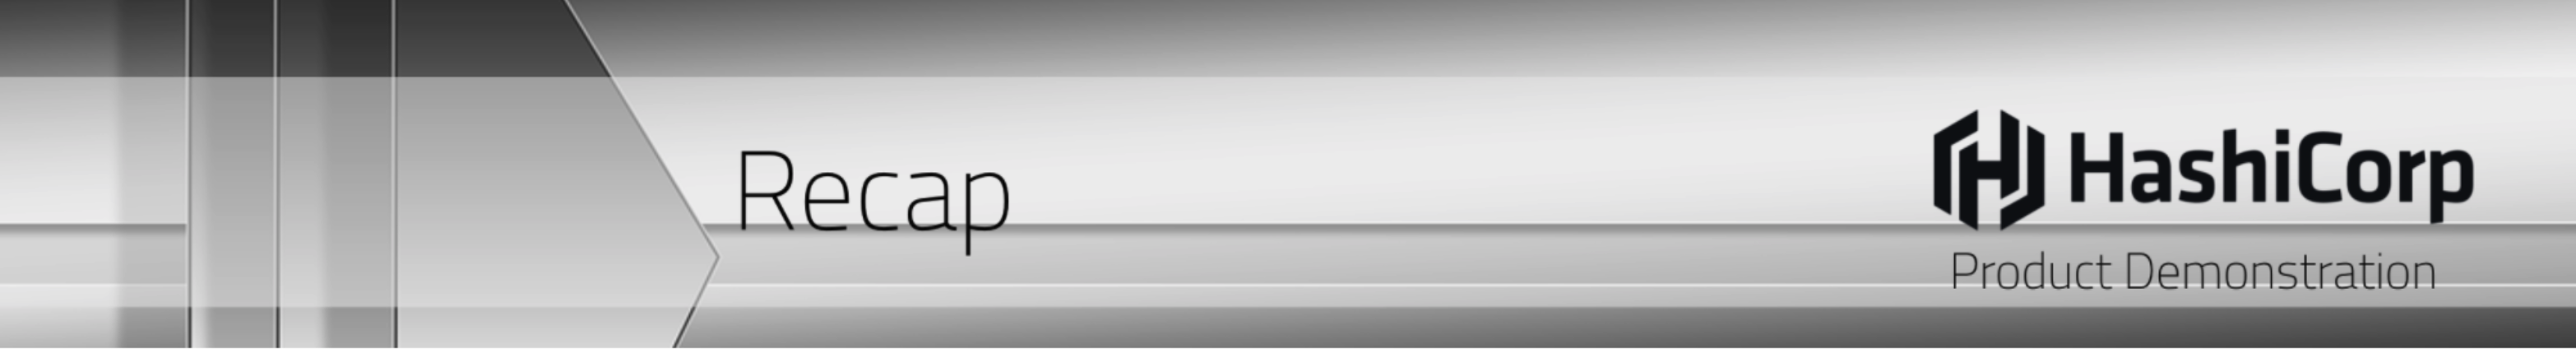
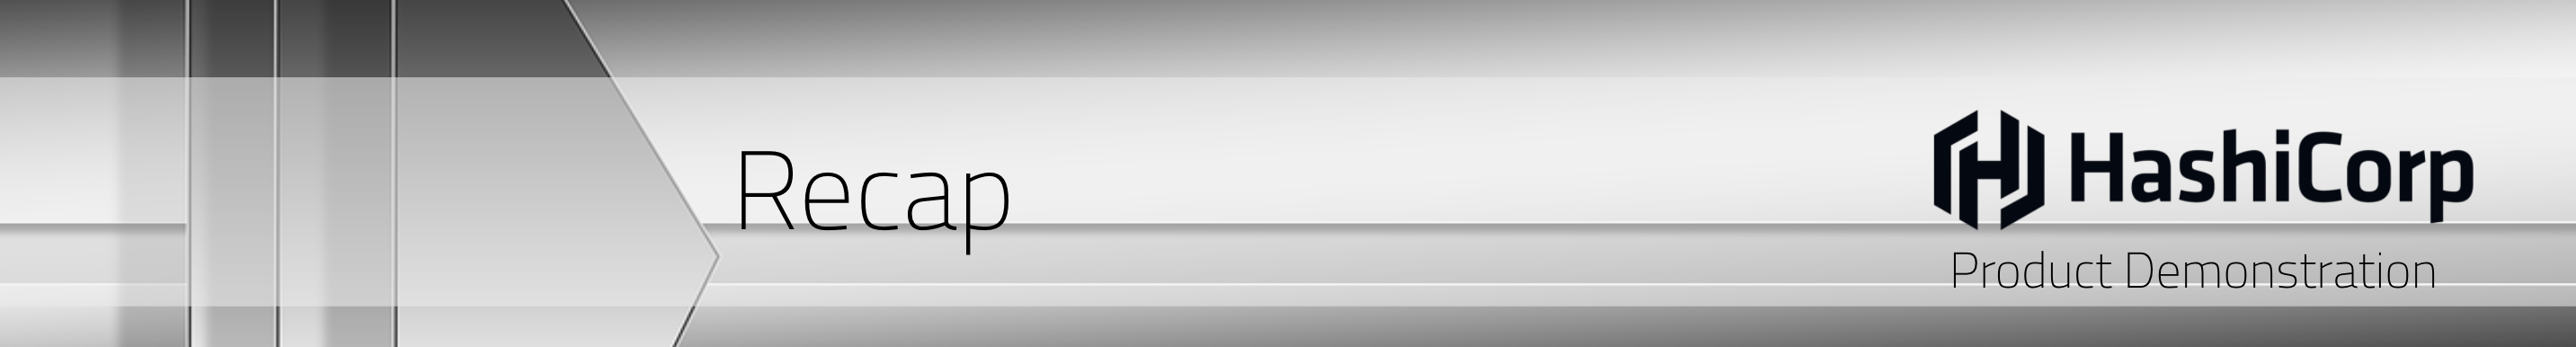

* ## <span style="color: #001f3f; padding: 15px; border-radius: 2px">Configure A Cert Authority</span>
* ## <span style="color: #001f3f; padding: 15px; border-radius: 2px">Tune Certificate times and update CRLs</span>
* ## <span style="color: #001f3f; padding: 15px; border-radius: 2px">Give users an easy way to request certs</span>
